<a href="https://colab.research.google.com/github/cosminnedescu/ProjectMLDL/blob/main/plots/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.ticker import PercentFormatter

In [2]:
!rm -rf ProjectMLDL
if not os.path.isdir('/content/ProjectMLDL'):
  !git clone https://github.com/cosminnedescu/ProjectMLDL.git
  %cd /content/ProjectMLDL
  !rm -rf LICENSE README.md

Cloning into 'ProjectMLDL'...
remote: Enumerating objects: 3545, done.
remote: Counting objects: 100% (961/961), done.
remote: Compressing objects: 100% (401/401), done.
remote: Total 3545 (delta 553), reused 931 (delta 544), pack-reused 2584
Receiving objects: 100% (3545/3545), 181.77 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (1938/1938), done.
Checking out files: 100% (390/390), done.
/content/ProjectMLDL


# Plot Test Accuracies: Baselines

In [ ]:
jsonfile = open("states/FineTuning/FineTuning_test_accuracy.json")
FineTuning_test_accuracy = json.load(jsonfile)

jsonfile = open("states/JointTraining/JointTraining_test_accuracy.json")
JointTraining_test_accuracy = json.load(jsonfile)

jsonfile = open("states/LWF/LWF_test_accuracy.json")
LWF_test_accuracy =json.load(jsonfile)

jsonfile = open("states/iCaRL_Hybrid1/iCaRL_test_accuracy_hybrid1.json")
Hybrid1_test_accuracy =json.load(jsonfile)

jsonfile = open("states/iCaRL/iCaRL_test_accuracy.json")
iCaRL_test_accuracy =json.load(jsonfile)

In [ ]:
FineTuning_test_accuracy = np.array(FineTuning_test_accuracy)
JointTraining_test_accuracy = np.array(JointTraining_test_accuracy)
LWF_test_accuracy = np.array(LWF_test_accuracy)
Hybrid1_test_accuracy = np.array(Hybrid1_test_accuracy)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)

FineTuning_test_accuracy_stats = np.array([FineTuning_test_accuracy.mean(0), FineTuning_test_accuracy.std(0)]).transpose()
JointTraning_test_accuracy_stats = np.array([JointTraining_test_accuracy.mean(0), JointTraining_test_accuracy.std(0)]).transpose()
LWF_test_accuracy_stats = np.array([LWF_test_accuracy.mean(0), LWF_test_accuracy.std(0)]).transpose()
Hybrid1_test_accuracy_stats = np.array([Hybrid1_test_accuracy.mean(0), Hybrid1_test_accuracy.std(0)]).transpose()
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0), iCaRL_test_accuracy.std(0)]).transpose()

In [ ]:
print(f"Average test accuracy:")
FineTuning_test_accuracy_avg = FineTuning_test_accuracy_stats[:, 0].mean()
print(f"Fine Tuning:  {FineTuning_test_accuracy_avg}")
LWF_test_accuracy_avg = LWF_test_accuracy_stats[:, 0].mean()
print(f"LWF:  {LWF_test_accuracy_avg}")
Hybrid1_test_accuracy_avg = Hybrid1_test_accuracy_stats[:, 0].mean()
print(f"Hybrid1:  {Hybrid1_test_accuracy_avg}")
iCaRL_test_accuracy_avg = iCaRL_test_accuracy_stats[:, 0].mean()
print(f"iCaRL:  {iCaRL_test_accuracy_avg}")
JointTraining_test_accuracy_avg = JointTraning_test_accuracy_stats[:, 0].mean()
print(f"JointTraining:  {JointTraining_test_accuracy_avg}")

Average test accuracy:
Fine Tuning:  0.23839697963635112
LWF:  0.4178301829897567
Hybrid1:  0.5040855704025555
iCaRL:  0.5573148547281831
JointTraining:  0.7366146058691495


In [ ]:
def plot_test_accuracy(finetuning, jointtraining, lwf, hybrid1, icarl, save_directory = None):
  finetuning_mean = np.array(finetuning)[:, 0]
  finetuning_std = np.array(finetuning)[:, 1]
  jointtraining_mean = np.array(jointtraining)[:, 0]
  jointtraining_std = np.array(jointtraining)[:, 1]
  lfw_mean = np.array(lwf)[:, 0]
  lfw_std = np.array(lwf)[:, 1]
  hybrid1_mean = np.array(hybrid1)[:, 0]
  hybrid1_std = np.array(hybrid1)[:, 1]
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  fig, ax = plt.subplots(figsize = (6, 6), dpi = 900)
  x = np.arange(10, 101, 10)
  plt.ylim([0.05, 0.95])
  ax.errorbar(x, jointtraining_mean, jointtraining_std, label = 'JointTraining')
  ax.errorbar(x, finetuning_mean, finetuning_std, label = 'FineTuning')
  ax.errorbar(x, lfw_mean, lfw_std, label = 'LearningWithoutForgetting')
  ax.errorbar(x, hybrid1_mean, hybrid1_std, label = 'Hybrid1')
  ax.errorbar(x, icarl_mean, icarl_std, label = 'iCaRL')
  ax.set_xlabel("Number of classes")
  plt.tight_layout()
  plt.grid(axis='y')
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(FineTuning_test_accuracy_stats, 
                   JointTraning_test_accuracy_stats, 
                   LWF_test_accuracy_stats, 
                   Hybrid1_test_accuracy_stats,
                   iCaRL_test_accuracy_stats,
                   "baselines_acc")

# Plot Test Accuracies LWF: trainer validate vs lwf validate

In [ ]:
jsonfile = open("states/LWF/LWF_test_accuracy.json")
LWF_test_accuracy =json.load(jsonfile)
LWF_test_accuracy = np.array(LWF_test_accuracy)
LWF_test_accuracy_stats = np.array([LWF_test_accuracy.mean(0) * 100, LWF_test_accuracy.std(0) * 100]).transpose()

jsonfile = open("states/LWF/LWF_test_accuracy_trainer_validate.json")
LWF_test_accuracy_tv =json.load(jsonfile)
LWF_test_accuracy_tv = np.array(LWF_test_accuracy_tv)
LWF_test_accuracy_tv_stats = np.array([LWF_test_accuracy_tv.mean(0) * 100, LWF_test_accuracy_tv.std(0) * 100]).transpose()

In [ ]:
def plot_test_accuracy(lwf, lwf_tv, save_directory = None):
  lfw_mean = np.array(lwf)[:, 0]
  lfw_std = np.array(lwf)[:, 1]
  tv_mean = np.array(lwf_tv)[:, 0]
  tv_std = np.array(lwf_tv)[:, 1]
  fig, ax = plt.subplots(figsize = (10, 5), dpi = 100)
  x = np.arange(10, 101, 10)
  ax.errorbar(x, lfw_mean, lfw_std, label = 'LearningWithoutForgetting')
  ax.errorbar(x, tv_mean, tv_std, label = 'LearningWithoutForgetting_TV')
  ax.set_xlabel("Number of classes")
  plt.tight_layout()
  plt.title("Test Accuracies", loc="center")
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(LWF_test_accuracy_stats, 
                   LWF_test_accuracy_tv_stats)

# Plot Test Accuracies iCaRL: random vs herding

In [ ]:
jsonfile = open("states/iCaRL/iCaRL_test_accuracy.json")
iCaRL_test_accuracy = json.load(jsonfile)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0) * 100, iCaRL_test_accuracy.std(0) * 100]).transpose()

jsonfile = open("states/iCaRL/iCaRL_test_accuracy_herding.json")
iCaRL_test_accuracy_herding = json.load(jsonfile)
iCaRL_test_accuracy_herding = np.array(iCaRL_test_accuracy_herding)
iCaRL_test_accuracy_herding_stats = np.array([iCaRL_test_accuracy_herding.mean(0) * 100, iCaRL_test_accuracy_herding.std(0) * 100]).transpose()

jsonfile = open("states/Hybrid1/Hybrid1_test_accuracy.json")
Hybrid1_test_accuracy =json.load(jsonfile)
Hybrid1_test_accuracy = np.array(Hybrid1_test_accuracy)
Hybrid1_test_accuracy_stats = np.array([Hybrid1_test_accuracy.mean(0) * 100, Hybrid1_test_accuracy.std(0) * 100]).transpose()

In [ ]:
def plot_test_accuracy(icarl, icarl_herding, hybrid1, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  herding_mean = np.array(icarl_herding)[:, 0]
  herding_std = np.array(icarl_herding)[:, 1]
  hybrid1_mean = np.array(hybrid1)[:, 0]
  hybrid1_std = np.array(hybrid1)[:, 1]
  fig, ax = plt.subplots(figsize = (10, 5), dpi = 100)
  x = np.arange(10, 101, 10)
  ax.errorbar(x, icarl_mean, icarl_std, label = 'iCaRL Random')
  ax.errorbar(x, herding_mean, herding_std, label = 'iCaRL Herding')
  ax.errorbar(x, hybrid1_mean, hybrid1_std, label = 'Hybrid1')
  ax.set_xlabel("Number of classes")
  plt.tight_layout()
  plt.title("Test Accuracies", loc="center")
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   iCaRL_test_accuracy_herding_stats,
                   Hybrid1_test_accuracy_stats)

# Plot Test Accuracies Ablation Study: Losses

In [ ]:
jsonfile = open("states/iCaRL/iCaRL_test_accuracy.json")
iCaRL_test_accuracy = json.load(jsonfile)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0), iCaRL_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_test_accuracy.json")
Cosine_test_accuracy = json.load(jsonfile)
Cosine_test_accuracy = np.array(Cosine_test_accuracy)
Cosine_test_accuracy_stats = np.array([Cosine_test_accuracy.mean(0), Cosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_L1/iCaRL_Loss_L1_test_accuracy.json")
L1_test_accuracy =json.load(jsonfile)
L1_test_accuracy = np.array(L1_test_accuracy)
L1_test_accuracy_stats = np.array([L1_test_accuracy.mean(0), L1_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_L2/iCaRL_Loss_L2_test_accuracy.json")
L2_test_accuracy =json.load(jsonfile)
L2_test_accuracy = np.array(L2_test_accuracy)
L2_test_accuracy_stats = np.array([L2_test_accuracy.mean(0), L2_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_features_test_accuracy.json")
fCosine_test_accuracy = json.load(jsonfile)
fCosine_test_accuracy = np.array(fCosine_test_accuracy)
fCosine_test_accuracy_stats = np.array([fCosine_test_accuracy.mean(0), fCosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_L2/iCaRL_Loss_L2_features_test_accuracy.json")
fL2_test_accuracy =json.load(jsonfile)
fL2_test_accuracy = np.array(fL2_test_accuracy)
fL2_test_accuracy_stats = np.array([fL2_test_accuracy.mean(0), fL2_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_L1/iCaRL_Loss_L1_features_test_accuracy.json")
fL1_test_accuracy =json.load(jsonfile)
fL1_test_accuracy = np.array(fL1_test_accuracy)
fL1_test_accuracy_stats = np.array([fL1_test_accuracy.mean(0), fL1_test_accuracy.std(0)]).transpose()

In [ ]:
print(f"Average test accuracy:")
iCaRL_test_accuracy_avg = iCaRL_test_accuracy_stats[:, 0].mean()
print(f"BCE+BCE:  {iCaRL_test_accuracy_avg}")
Cosine_test_accuracy_avg = Cosine_test_accuracy_stats[:, 0].mean()
print(f"CE+Cosine on FC:  {Cosine_test_accuracy_avg}")
fCosine_test_accuracy_avg = fCosine_test_accuracy_stats[:, 0].mean()
print(f"CE+Cosine on Features:  {fCosine_test_accuracy_avg}")
L1_test_accuracy_avg = L1_test_accuracy_stats[:, 0].mean()
print(f"CE+L1 on FC:  {L1_test_accuracy_avg}")
fL1_test_accuracy_avg = fL1_test_accuracy_stats[:, 0].mean()
print(f"CE+L1 on Features:  {fL1_test_accuracy_avg}")
L2_test_accuracy_avg = L2_test_accuracy_stats[:, 0].mean()
print(f"CE+L2 on FC:  {L2_test_accuracy_avg}")
fL2_test_accuracy_avg = fL2_test_accuracy_stats[:, 0].mean()
print(f"CE+L2 on Features:  {fL2_test_accuracy_avg}")

Average test accuracy:
BCE+BCE:  0.5573148547281831
CE+Cosine on FC:  0.585579229995283
CE+Cosine on Features:  0.5640569600988095
CE+L1 on FC:  0.533209131746379
CE+L1 on Features:  0.5822746337073637
CE+L2 on FC:  0.5508251751746449
CE+L2 on Features:  0.58008917587448


In [ ]:
def plot_test_accuracy(icarl, cosine, l1, l2, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  l1_mean = np.array(l1)[:, 0]
  l1_std = np.array(l1)[:, 1]
  l2_mean = np.array(l2)[:, 0]
  l2_std = np.array(l2)[:, 1]
  fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
  x = np.arange(10, 101, 10)
  plt.ylim([0.05, 0.95])
  ax.errorbar(x, icarl_mean, icarl_std, label = 'BCE+BCE')
  ax.errorbar(x, cosine_mean, cosine_std, label = 'CE+Cosine')
  ax.errorbar(x, l1_mean, l1_std, label = 'CE+L1')
  ax.errorbar(x, l2_mean, l2_std, label = 'CE+L2')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   Cosine_test_accuracy_stats,
                   L1_test_accuracy_stats,
                   L2_test_accuracy_stats)

In [ ]:
def plot_test_accuracy(icarl, cosine, l1, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  l1_mean = np.array(l1)[:, 0]
  l1_std = np.array(l1)[:, 1]
  #l2_mean = np.array(l2)[:, 0]
  #l2_std = np.array(l2)[:, 1]
  fig, ax = plt.subplots(figsize = (7, 7), dpi = 900)
  x = np.arange(10, 101, 10)
  plt.ylim([0.05, 0.95])
  ax.errorbar(x, icarl_mean, icarl_std, label = 'BCE + BCE') 
  ax.errorbar(x, l1_mean, l1_std, label = 'CE + L2 on Features')
  ax.errorbar(x, cosine_mean, cosine_std, label = 'CE + L2 on FC')
  #ax.errorbar(x, l2_mean, l2_std, label = 'CE+L2')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   Cosine_test_accuracy_stats,
                   fCosine_test_accuracy_stats,
                   'cos_acc')

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   L1_test_accuracy_stats,
                   fL1_test_accuracy_stats,
                   "l1_acc")

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   L2_test_accuracy_stats,
                   fL2_test_accuracy_stats,
                   "l2_acc")

# Plot Test Accuracies Ablation Study: Classifiers

In [ ]:
jsonfile = open("states/iCaRL/iCaRL_test_accuracy.json")
iCaRL_test_accuracy = json.load(jsonfile)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0), iCaRL_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Classifier_CosineLayer/iCaRL_Classifier_Cosine_test_accuracy.json")
Cosine_test_accuracy = json.load(jsonfile)
Cosine_test_accuracy = np.array(Cosine_test_accuracy)
Cosine_test_accuracy_stats = np.array([Cosine_test_accuracy.mean(0), Cosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Classifier_SVM/iCaRL_Classifier_SVM_test_accuracy.json")
SVM_test_accuracy =json.load(jsonfile)
SVM_test_accuracy = np.array(SVM_test_accuracy)
SVM_test_accuracy_stats = np.array([SVM_test_accuracy.mean(0), SVM_test_accuracy.std(0)]).transpose()

In [ ]:
jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_final_test_accuracy.json")
fCosine_test_accuracy = json.load(jsonfile)
fCosine_test_accuracy = np.array(fCosine_test_accuracy)
fCosine_test_accuracy_stats = np.array([fCosine_test_accuracy.mean(0), fCosine_test_accuracy.std(0)]).transpose()

In [ ]:
print(f"Average test accuracy:")
iCaRL_test_accuracy_avg = iCaRL_test_accuracy_stats[:, 0].mean()
print(f"NME:  {iCaRL_test_accuracy_avg}")
SVM_test_accuracy_avg = SVM_test_accuracy_stats[:, 0].mean()
print(f"SVM:  {SVM_test_accuracy_avg}")
Cosine_test_accuracy_avg = Cosine_test_accuracy_stats[:, 0].mean()
print(f"Cosine Layer:  {Cosine_test_accuracy_avg}")
fCosine_test_accuracy_avg = fCosine_test_accuracy_stats[:, 0].mean()
print(f"Cosine Layer + Cosine on FC:  {fCosine_test_accuracy_avg}")

Average test accuracy:
NME:  0.5573148547281831
SVM:  0.5384595232303712
Cosine Layer:  0.5840216324272104
Cosine Layer + Cosine on FC:  0.5922241881154122


In [ ]:
fCosine_test_accuracy_avg = fCosine_test_accuracy_stats[:5, 0].mean()
print(f"Cosine Layer + Cosine on FC:  {fCosine_test_accuracy_avg}")

Cosine Layer + Cosine on FC:  0.7127270866405684


In [ ]:
def plot_test_accuracy(icarl, cosine, svm, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  svm_mean = np.array(svm)[:, 0]
  svm_std = np.array(svm)[:, 1]
  fig, ax = plt.subplots(figsize = (6, 6), dpi = 900)
  x = np.arange(10, 101, 10)
  plt.ylim([0.05, 0.95])
  ax.errorbar(x, icarl_mean, icarl_std, label = 'NME')
  ax.errorbar(x, svm_mean, svm_std, label = 'SVM')
  ax.errorbar(x, cosine_mean, cosine_std, label = 'Cosine Layer')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

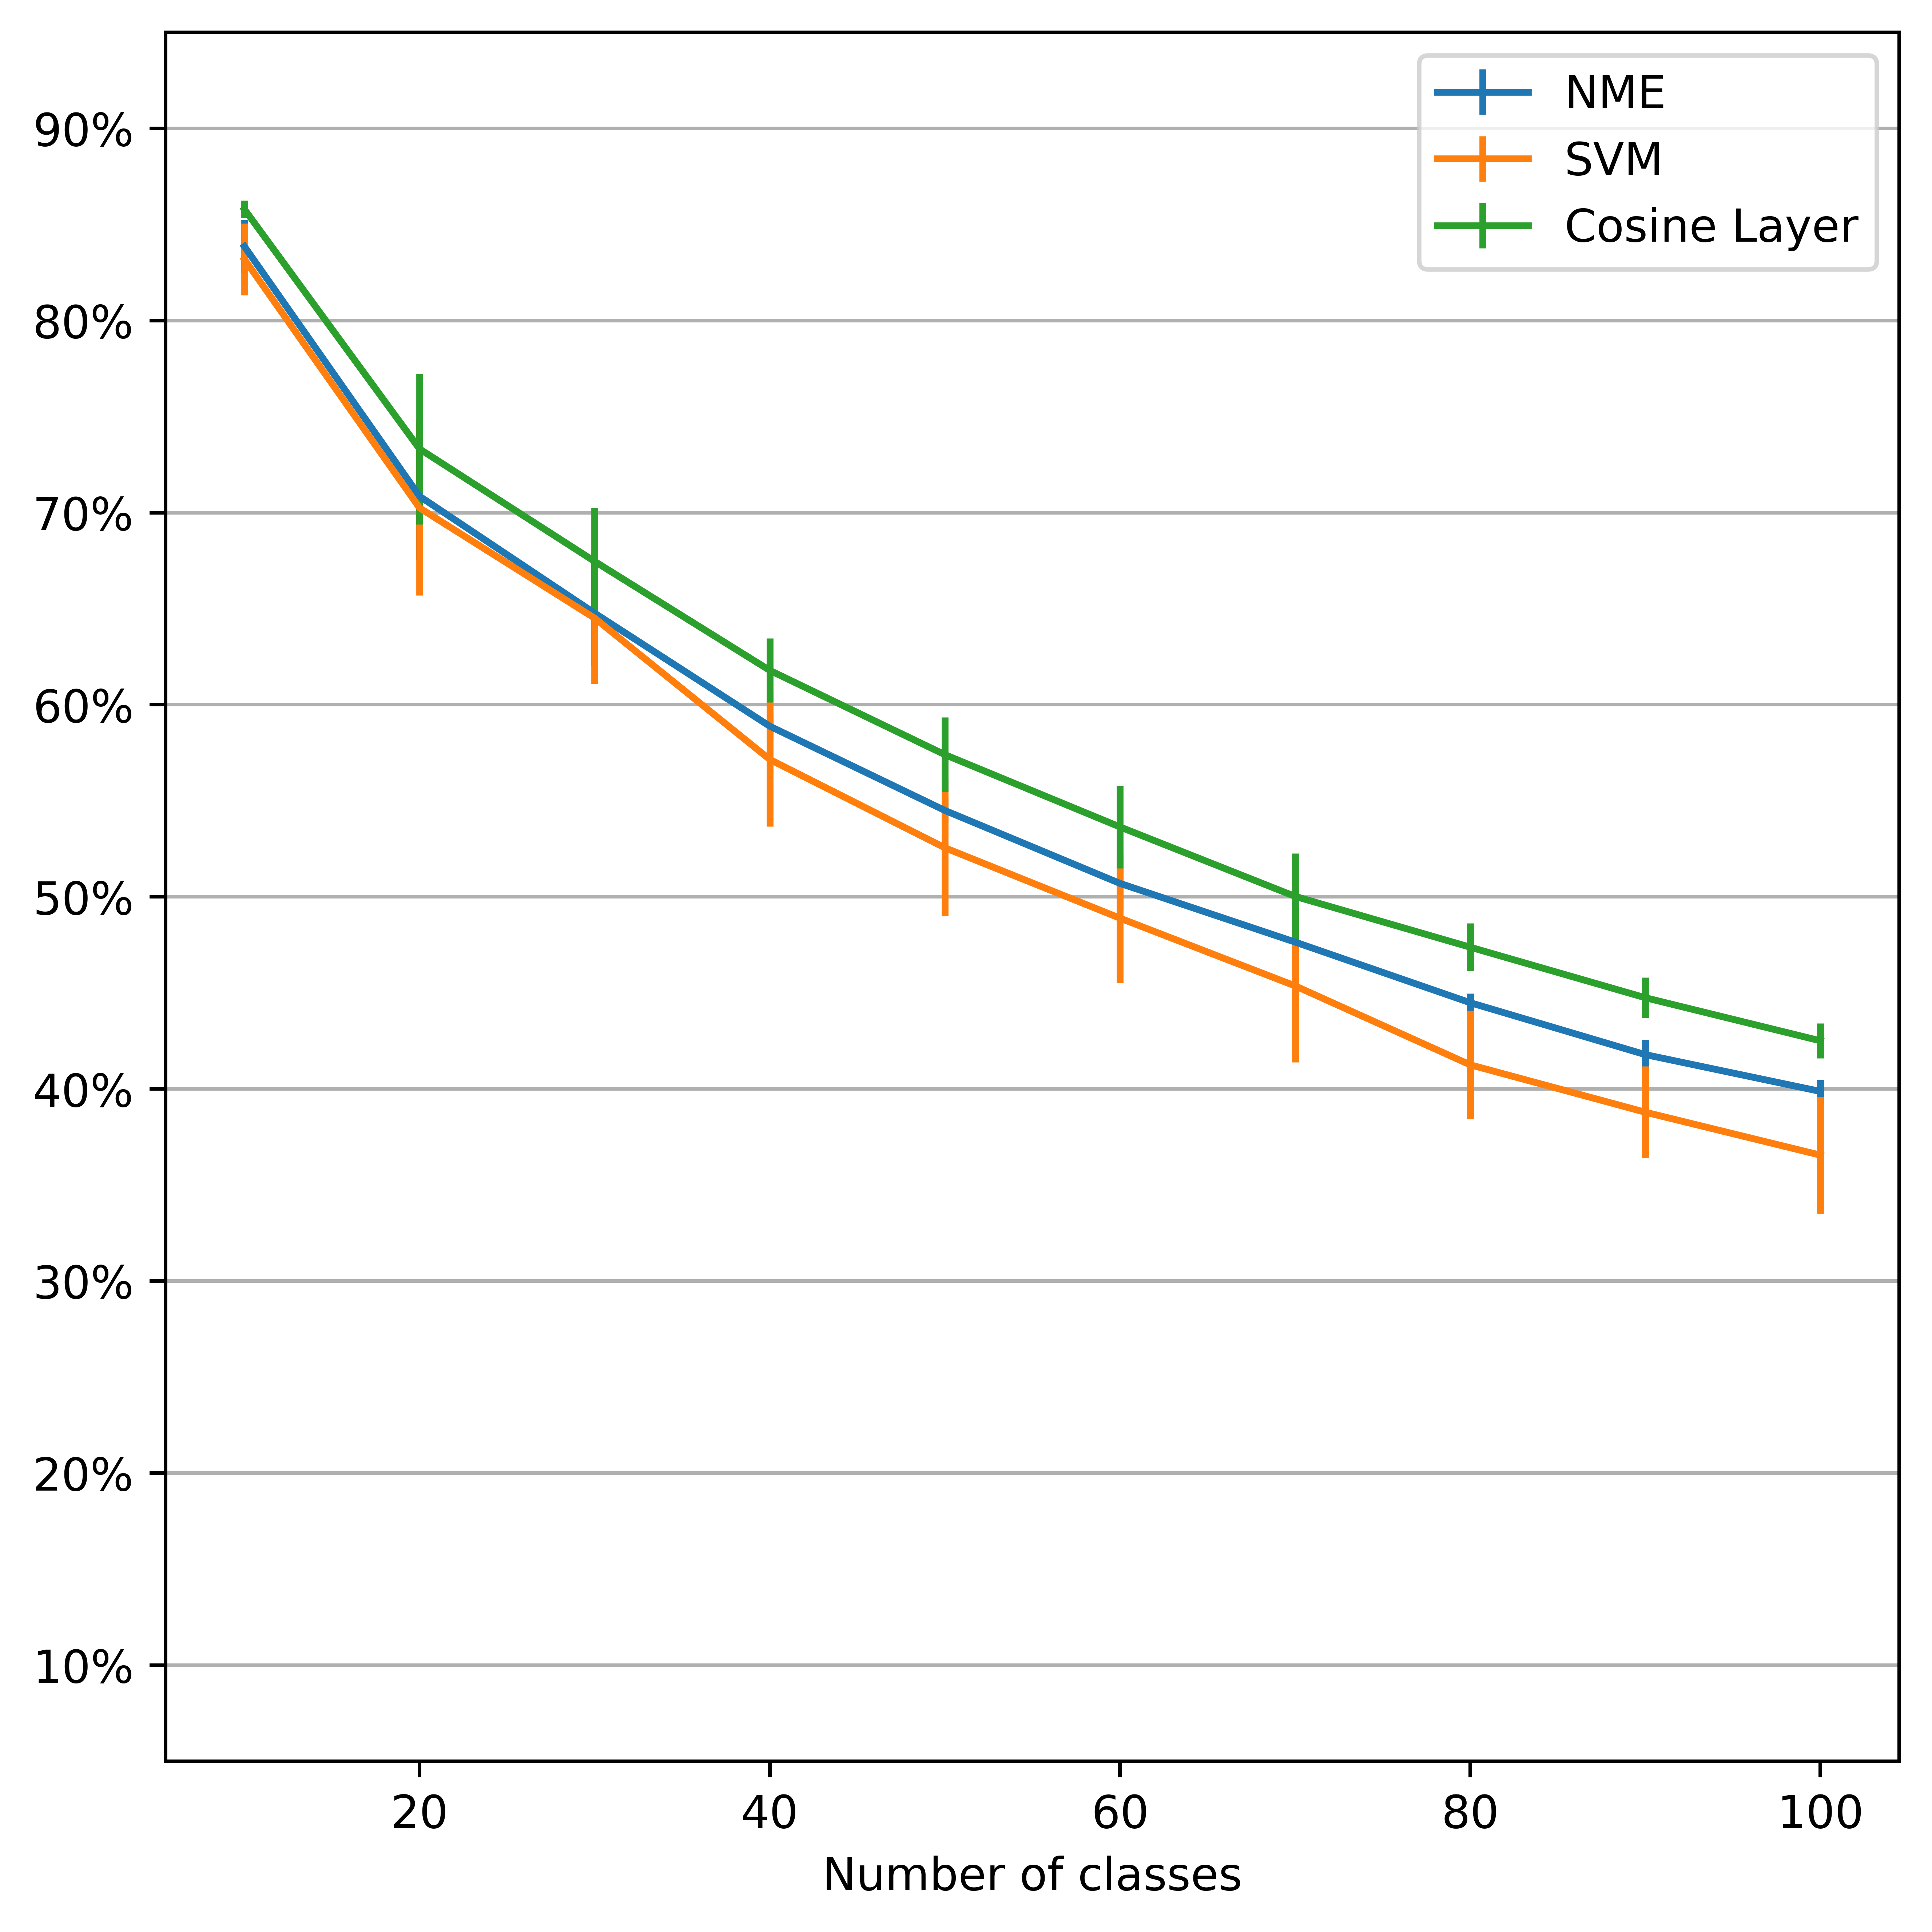

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   Cosine_test_accuracy_stats,
                   SVM_test_accuracy_stats,
                   "clf_acc")

# Plot Test Accuracies Ablation Study: Final Results

In [ ]:
jsonfile = open("states/iCaRL_Classifier_CosineLayer/iCaRL_Classifier_Cosine_test_accuracy.json")
Cosine_test_accuracy = json.load(jsonfile)
Cosine_test_accuracy = np.array(Cosine_test_accuracy)
Cosine_test_accuracy_stats = np.array([Cosine_test_accuracy.mean(0), Cosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_final_test_accuracy.json")
xCosine_test_accuracy = json.load(jsonfile)
xCosine_test_accuracy = np.array(xCosine_test_accuracy)
xCosine_test_accuracy_stats = np.array([xCosine_test_accuracy.mean(0), xCosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_features_test_accuracy.json")
fCosine_test_accuracy = json.load(jsonfile)
fCosine_test_accuracy = np.array(fCosine_test_accuracy)
fCosine_test_accuracy_stats = np.array([fCosine_test_accuracy.mean(0), fCosine_test_accuracy.std(0)]).transpose()

In [ ]:
def plot_test_accuracy(icarl, cosine, svm, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  svm_mean = np.array(svm)[:, 0]
  svm_std = np.array(svm)[:, 1]
  fig, ax = plt.subplots(figsize = (6, 6), dpi = 900)
  x = np.arange(10, 101, 10)
  plt.ylim([0.05, 0.95])
  ax.errorbar(x, icarl_mean, icarl_std, label = 'Cosine Layer + BCE+BCE')
  ax.errorbar(x, svm_mean, svm_std, label = 'FC Layer + CE+Cosine')
  ax.errorbar(x, cosine_mean, cosine_std, label = 'Cosine Layer + CE+Cosine')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(Cosine_test_accuracy_stats, 
                   xCosine_test_accuracy_stats,
                   fCosine_test_accuracy_stats,
                   "clf_cos_acc")

# Plot Confusion Matrix

In [ ]:
from data.utils_plot import plot_confusion_matrix

In [ ]:
jsonfile = open("states/ConfusionMatrix/FineTuning_predictions.json")
FineTuning_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/FineTuning_true_labels.json")
FineTuning_true_labels =json.load(jsonfile)

In [ ]:
jsonfile = open("states/ConfusionMatrix/LWF_predictions.json")
LWF_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/LWF_true_labels.json")
LWF_true_labels =json.load(jsonfile)

In [ ]:
jsonfile = open("states/ConfusionMatrix/iCaRL_predictions_hybrid1.json")
Hybrid1_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/iCaRL_true_labels_hybrid1.json")
Hybrid1_true_labels =json.load(jsonfile)

In [ ]:
jsonfile = open("states/ConfusionMatrix/iCaRL_predictions.json")
iCaRL_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/iCaRL_true_labels.json")
iCaRL_true_labels =json.load(jsonfile)

Fine Tuning Confusion Matrix

In [ ]:
preds = np.array(FineTuning_predictions[1])
targets = np.array(FineTuning_true_labels[1])

f, axes = plt.subplots(1, 1, figsize=(7,7), dpi=1200)
cf_matrix = confusion_matrix(targets, preds)
ax1 = sns.heatmap(cf_matrix,cmap='coolwarm', yticklabels=False, xticklabels=False, cbar=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.get_figure().savefig("conf_finetuning")

Learning Without Forgetting Confusion Matrix

In [ ]:
preds = np.array(LWF_predictions[1])
targets = np.array(LWF_true_labels[1])

f, axes = plt.subplots(1, 1, figsize=(7,7), dpi=1200)
cf_matrix = confusion_matrix(targets, preds)
ax1 = sns.heatmap(cf_matrix,cmap='coolwarm', yticklabels=False, xticklabels=False, cbar=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.get_figure().savefig("conf_LWF")

Hybrid1 Confusion Matrix 

In [ ]:
preds = np.array(Hybrid1_predictions[1])
targets = np.array(Hybrid1_true_labels[1])

f, axes = plt.subplots(1, 1, figsize=(7,7), dpi=1200)
cf_matrix = confusion_matrix(targets, preds)
ax1 = sns.heatmap(cf_matrix,cmap='coolwarm', yticklabels=False, xticklabels=False, cbar=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.get_figure().savefig("conf_hybrid1")

iCaRL Confusion Matrix

In [ ]:
preds = np.array(iCaRL_predictions[1])
targets = np.array(iCaRL_true_labels[1])

f, axes = plt.subplots(1, 1, figsize=(7, 7), dpi=1200)
cf_matrix = confusion_matrix(targets, preds)
ax1 = sns.heatmap(cf_matrix,cmap='coolwarm', yticklabels=False, xticklabels=False, cbar=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.get_figure().savefig("conf_iCaRL2")

# OWR: closed world accuracy

In [3]:
jsonfile = open("states/owr/naive closed/050_test_accuracy.json")
iCaRL_test_accuracy = json.load(jsonfile)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0), iCaRL_test_accuracy.std(0)]).transpose()

jsonfile = open("states/owr/naive closed/075_test_accuracy.json")
Cosine_test_accuracy = json.load(jsonfile)
Cosine_test_accuracy = np.array(Cosine_test_accuracy)
Cosine_test_accuracy_stats = np.array([Cosine_test_accuracy.mean(0), Cosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/owr/naive closed/095_test_accuracy.json")
SVM_test_accuracy =json.load(jsonfile)
SVM_test_accuracy = np.array(SVM_test_accuracy)
SVM_test_accuracy_stats = np.array([SVM_test_accuracy.mean(0), SVM_test_accuracy.std(0)]).transpose()

In [4]:
print(f"Average test accuracy t=0.50:")
for m, s in iCaRL_test_accuracy_stats[:]:
  s = s*2
  print(f"{m}+-{s}")
print(f"Average test accuracy t=0.75:")
for m, s in Cosine_test_accuracy_stats[:]:
  s = s*2
  print(f"{m}+-{s}")
print(f"Average test accuracy t=0.95:")
for m, s in SVM_test_accuracy_stats[:]:
  s = s*2
  print(f"{m}+-{s}")

Average test accuracy t=0.50:
0.8550297619047619+-0.008256018899721707
0.7595833333333334+-0.07631543185286248
0.6779076086956523+-0.031431616231070464
0.5964516129032259+-0.039700046546609816
0.5304780982905982+-0.03890739688845427
Average test accuracy t=0.75:
0.7983630952380952+-0.017225947772009257
0.7062499999999999+-0.10100407376272832
0.6379076086956522+-0.031431616231070464
0.5564516129032259+-0.02497885422049169
0.507144764957265+-0.030610535863572676
Average test accuracy t=0.95:
0.7224702380952381+-0.008612973886004661
0.6309027777777778+-0.1144801724166382
0.5634057971014492+-0.04091281061105673
0.4762264784946237+-0.03092402098454322
0.4210069444444445+-0.020526309889787212


In [5]:
def plot_test_accuracy(icarl, cosine, svm, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  svm_mean = np.array(svm)[:, 0]
  svm_std = np.array(svm)[:, 1]
  fig, ax = plt.subplots(figsize = (6, 6), dpi = 900)
  x = np.arange(10, 51, 10)
  ax.errorbar(x, icarl_mean, icarl_std, label = 't = 0.50')
  ax.errorbar(x, cosine_mean, cosine_std, label = 't = 0.75')
  ax.errorbar(x, svm_mean, svm_std, label = 't = 0.95')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   Cosine_test_accuracy_stats,
                   SVM_test_accuracy_stats,
                   "closed_naive")

# OWR: harmonic mean

In [ ]:
jsonfile = open("states/owr/naive harmonic/050_test_accuracy.json")
iCaRL_test_accuracy = json.load(jsonfile)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0), iCaRL_test_accuracy.std(0)]).transpose()

jsonfile = open("states/owr/naive harmonic/075_test_accuracy.json")
Cosine_test_accuracy = json.load(jsonfile)
Cosine_test_accuracy = np.array(Cosine_test_accuracy)
Cosine_test_accuracy_stats = np.array([Cosine_test_accuracy.mean(0), Cosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/owr/naive harmonic/095_test_accuracy.json")
SVM_test_accuracy =json.load(jsonfile)
SVM_test_accuracy = np.array(SVM_test_accuracy)
SVM_test_accuracy_stats = np.array([SVM_test_accuracy.mean(0), SVM_test_accuracy.std(0)]).transpose()

In [ ]:
print(f"Average test accuracy t=0.50:")
for m, s in iCaRL_test_accuracy_stats[:]:
  s = s*2
  print(f"{m}+-{s}")
print(f"Average test accuracy t=0.75:")
for m, s in Cosine_test_accuracy_stats[:]:
  s = s*2
  print(f"{m}+-{s}")
print(f"Average test accuracy t=0.95:")
for m, s in SVM_test_accuracy_stats[:]:
  s = s*2
  print(f"{m}+-{s}")

Average test accuracy t=0.50:
0.12491551023896262+-0.02407505194504105
0.15530789048617533+-0.010596222147762973
0.1572101217693015+-0.014356546516604498
0.1646051146311636+-0.017071447707161395
0.15442637383837324+-0.011256320569178194
Average test accuracy t=0.75:
0.3953252333164395+-0.027050961732063006
0.39354170335995925+-0.014776677069733811
0.3839190504824366+-0.010361510592538913
0.3773338257667256+-0.0062987083225056854
0.3605645577100686+-0.013661076643076425
Average test accuracy t=0.95:
0.6332192252992016+-0.04460249230905815
0.5640342142903396+-0.014404420149417823
0.5319772927736164+-0.0008636739364037871
0.49364898191977064+-0.017635848454383297
0.46457119507829964+-0.014662214573604788


In [ ]:
def plot_test_accuracy(icarl, cosine, svm, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  svm_mean = np.array(svm)[:, 0]
  svm_std = np.array(svm)[:, 1]
  fig, ax = plt.subplots(figsize = (6, 6), dpi = 900)
  x = np.arange(10, 51, 10)
  ax.errorbar(x, icarl_mean, icarl_std, label = 't = 0.50')
  ax.errorbar(x, cosine_mean, cosine_std, label = 't = 0.75')
  ax.errorbar(x, svm_mean, svm_std, label = 't = 0.95')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   Cosine_test_accuracy_stats,
                   SVM_test_accuracy_stats,
                   "harmonic_naive")